In [1]:
import matplotlib.pyplot as py
import seaborn as sb
import pandas as pd

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Preparing data

In [7]:
reg=pd.get_dummies(data['region'])

In [8]:
reg.sample(6)

,northeast,northwest,southeast,southwest
116,0,0,1,0
544,0,1,0,0
1055,0,1,0,0
1076,0,0,0,1
1053,0,0,0,1
148,0,1,0,0


In [9]:
reg.drop('northeast', inplace=True, axis=1)

In [10]:
reg.sample(5)

,northwest,southeast,southwest
962,0,1,0
208,0,0,1
1292,0,1,0
656,0,0,1
1047,0,1,0


In [11]:
data.replace({'smoker':'yes'},1,inplace=True)
data.replace({'smoker':'no'},0,inplace=True)

In [12]:
data.replace({'sex':'male'},0,inplace=True)
data.replace({'sex':'female'},1,inplace=True)

In [13]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
520,50,1,27.36,0,0,northeast,25656.57526
722,62,0,37.40,0,0,southwest,12979.35800
95,28,1,37.62,1,0,southeast,3766.88380
170,63,0,41.47,0,0,southeast,13405.39030
383,35,1,43.34,2,0,southeast,5846.91760


In [14]:
new_data=pd.concat([data,reg],axis=1)
new_data.drop('region',inplace=True,axis=1)

In [15]:
new_data.sample(10)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
157,18,0,25.175,0,1,15518.18025,0,0,0
189,29,1,32.110,2,0,4922.91590,1,0,0
1246,45,1,25.700,3,0,9101.79800,0,0,1
800,42,1,26.180,1,0,7046.72220,0,1,0
103,61,1,29.920,3,1,30942.19180,0,1,0
107,26,0,30.875,2,0,3877.30425,1,0,0
856,48,1,33.110,0,1,40974.16490,0,1,0
284,52,1,31.200,0,0,9625.92000,0,0,1
75,57,0,34.010,0,0,11356.66090,1,0,0
1139,19,1,32.490,0,1,36898.73308,1,0,0


### Building our Machine Learning model

In [16]:
X=new_data[['age','sex','bmi','children','smoker','northwest','southeast','southwest']]
Y=new_data[['charges']]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [18]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
predictions=model.predict(X_test)

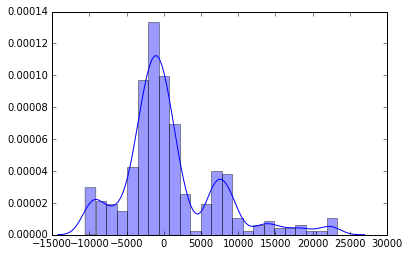

In [20]:
sb.distplot(y_test-predictions)

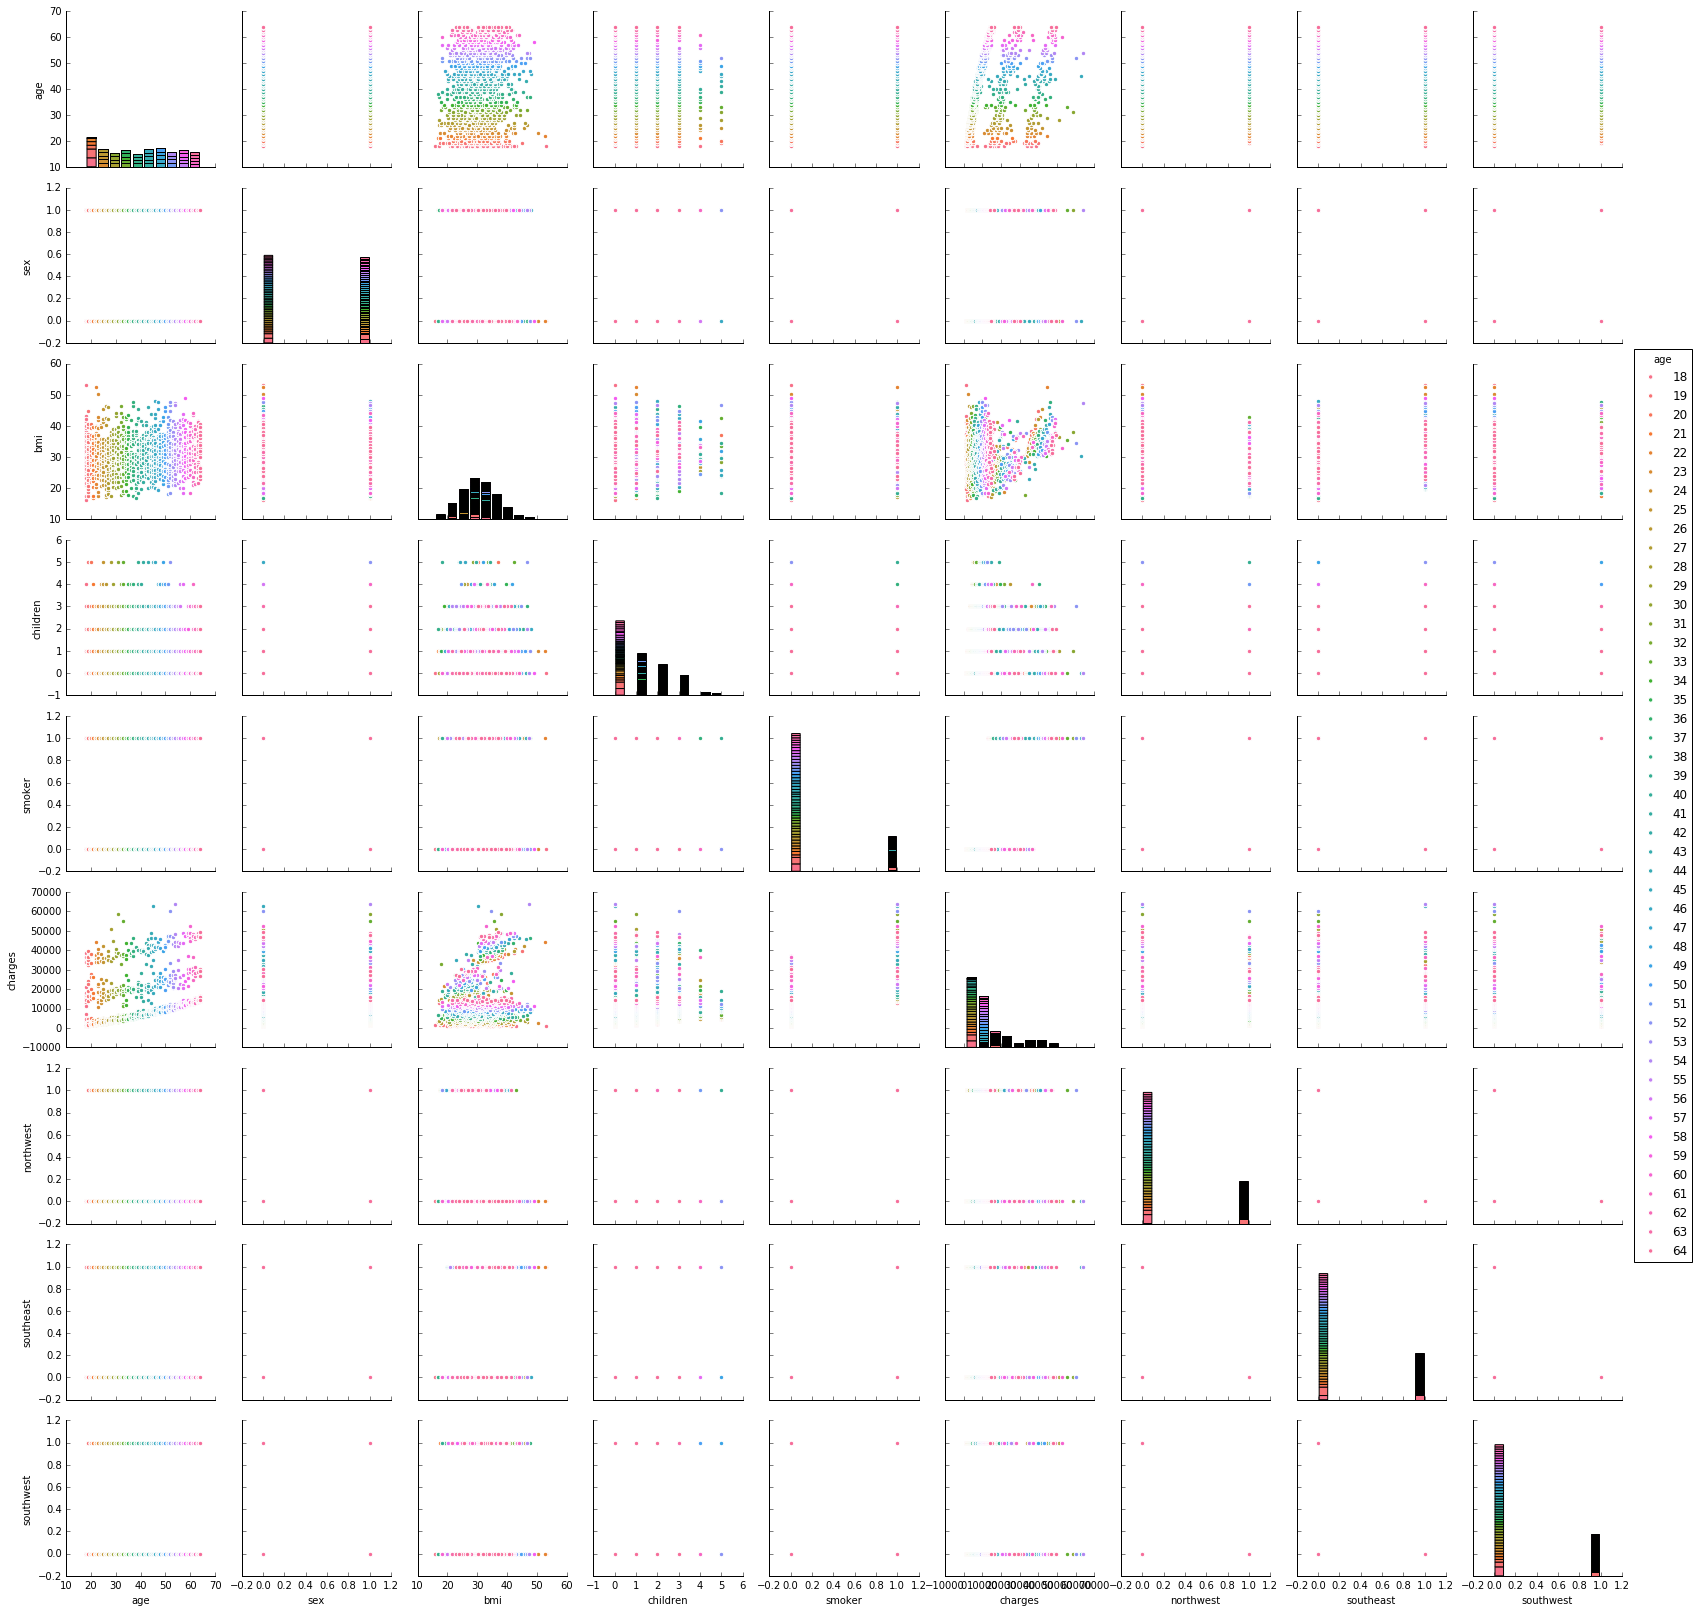

In [21]:
sb.pairplot(new_data,hue='age')

In [22]:
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
inputs=['age','charges','sex','bmi','children','smoker','northwest','southeast','southwest']

In [23]:
scaler=StandardScaler()
#new_data[inputs]=scaler.fit_transform(new_data[inputs])

In [24]:
new_data.sample(10)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
292,25,0,45.540,2,1,42112.23560,0,1,0
697,41,0,35.750,1,1,40273.64550,0,1,0
288,59,1,36.765,1,1,47896.79135,0,0,0
985,44,1,25.800,1,0,7624.63000,0,0,1
1235,26,0,31.065,0,0,2699.56835,1,0,0
1262,41,1,28.050,1,0,6770.19250,0,1,0
1058,24,1,39.490,0,0,2480.97910,0,1,0
469,18,1,24.090,1,0,2201.09710,0,1,0
338,50,0,32.300,1,1,41919.09700,0,0,0
520,50,1,27.360,0,0,25656.57526,0,0,0


In [25]:
from sklearn import metrics

In [26]:
metrics.mean_squared_error(y_pred=predictions,y_true=y_test)

41117530.624247275

In [27]:
metrics.explained_variance_score(y_pred=predictions,y_true=y_test)

0.7683801032369383

In [28]:
ols_model = sm.ols('charges ~ age+sex+bmi+children+smoker+northwest+southeast+southwest',data=new_data).fit()

In [29]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 09 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:57:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age          256.8564     11.899     21.587      0.000     233.514     280.199
sex          131.3144    332.945      0.394      0.693    -521.842     784.470
bmi          339.1935     28.599     11.860      0.000     283.088     395.298
children     475.5005    137.804      3.451      0.001     205.163     745.838
smoker      2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
northwest   -352.9639    476.276     -0.741      0.459   -1287.298     581.370
southeast  -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
southwest   -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
new_data[inputs]=scaler.fit_transform(new_data[inputs])

In [31]:
new_data.sample(5)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
749,-0.797954,-0.989591,0.034712,-0.908614,-0.507463,-0.843247,1.765481,-0.611324,-0.566418
954,-0.370746,-0.989591,-0.463983,-0.078767,1.970587,0.556707,1.765481,-0.611324,-0.566418
606,-0.869155,1.010519,-0.900341,-0.908614,-0.507463,-0.802265,-0.566418,-0.611324,-0.566418
888,-1.225161,-0.989591,1.449596,-0.908614,-0.507463,-0.957238,-0.566418,-0.611324,1.765481
523,-0.085942,1.010519,1.159237,-0.908614,-0.507463,-0.650350,-0.566418,1.635795,-0.566418


In [32]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 09 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:57:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age          256.8564     11.899     21.587      0.000     233.514     280.199
sex          131.3144    332.945      0.394      0.693    -521.842     784.470
bmi          339.1935     28.599     11.860      0.000     283.088     395.298
children     475.5005    137.804      3.451      0.001     205.163     745.838
smoker      2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
northwest   -352.9639    476.276     -0.741      0.459   -1287.298     581.370
southeast  -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
southwest   -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
ols_model2 = sm.ols('charges ~ children+age+smoker',data=new_data).fit()

In [34]:
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1165.
Date:                Mon, 09 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:57:48   Log-Likelihood:                -1037.9
No. Observations:                1338   AIC:                             2084.
Df Residuals:                    1334   BIC:                             2105.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.828e-17      0.014  -5.44e-15      1.000      -0.028       0.028
children       0.0484      0.014      3.363      0.001       0.020       0.077
age            0.3168      0.014     21.990      0.000       0.289       0.345
smoker         0.7948      0.014     55.212      0.000       0.767       0.823
==============================================================================
Omnibus:                      265.851   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.127
Skew:                           1.070   Prob(JB):                    1.82e-141
Kurtosis:                       5.654   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""